## Reading the Dataset

In [151]:
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Checking null

In [152]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [153]:
df = df.drop(columns = ['customerID'])

## EDA

## Data Summary

In [154]:
print("Columns: ", df.columns)
print("Dimension: ", df.ndim)
print("Size: ", df.size)
print("Shape: ", df.shape)

Columns:  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Dimension:  2
Size:  140860
Shape:  (7043, 20)


## Features

In [155]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Unique

In [156]:
print(df['InternetService'].unique())

['DSL' 'Fiber optic' 'No']


In [157]:
print(df['Contract'].unique())

['Month-to-month' 'One year' 'Two year']


In [158]:
print(df['MultipleLines'].unique())

['No phone service' 'No' 'Yes']


In [159]:
print(df['OnlineSecurity'].unique())

['No' 'Yes' 'No internet service']


In [160]:
print(df['SeniorCitizen'].unique())

[0 1]


## Description

In [161]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Encoding

In [163]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [164]:
print(df['TotalCharges'].unique())

[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


In [165]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

label_encoders = {}
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


## Checking and droping null after Encoding

In [167]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [168]:
df = df.dropna()

In [169]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Correlation

In [170]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


## Data Visualization

## Heatmap of null values

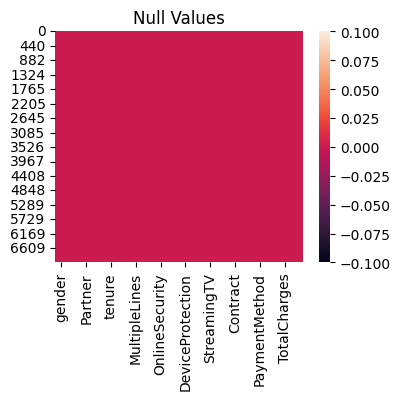

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (4,3))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

## Pairplot

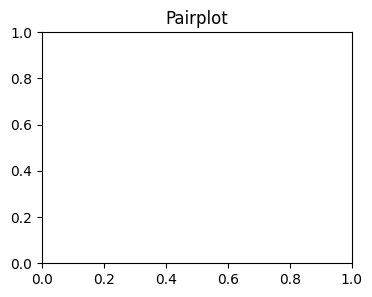

In [172]:
plt.figure(figsize = (4,3))
#sns.pairplot(df)
plt.title('Pairplot')
plt.show()

## Histographs

In [173]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

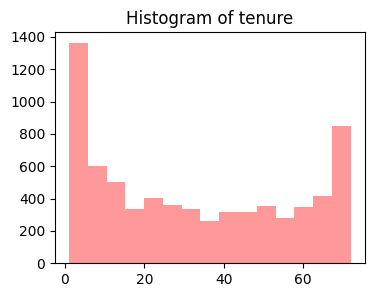

In [174]:
plt.figure(figsize = (4,3))
plt.hist(df['tenure'], bins = 15, color = '#ff9999')
plt.title('Histogram of tenure')
plt.show()

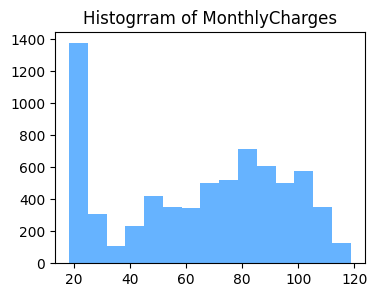

In [175]:
plt.figure(figsize = (4,3))
plt.hist(df['MonthlyCharges'], bins = 15, color = '#66b3ff')
plt.title('Histogrram of MonthlyCharges')
plt.show()

## Heatmap of correlatoin matrix

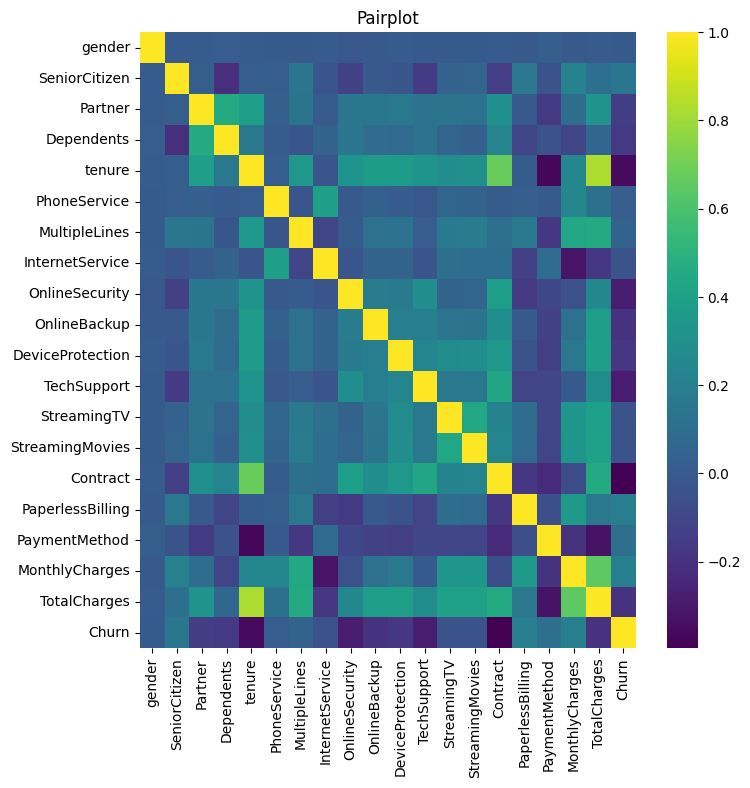

In [176]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),cmap = 'viridis') #annot=True for putting vlue in heatmap
plt.title('Pairplot')
plt.show()

## Pie Chart For Gender Distribution

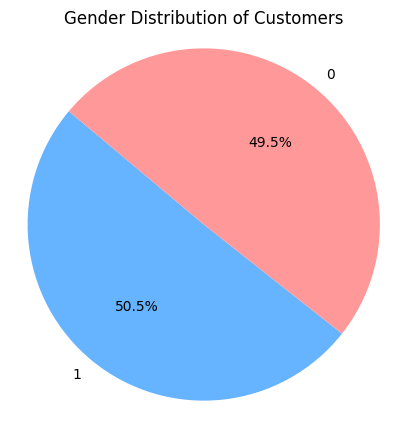

In [177]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Gender Distribution of Customers')
plt.axis('equal')  
plt.show()

## Data Preprocessing

In [178]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [179]:
df = df.drop(columns = ['gender'])

# Standardization

In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

continuous_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])
df[continuous_columns] = scaler.transform(df[continuous_columns])

## Input feature and Target feature

In [181]:
X = df.drop(columns='Churn')
y = df['Churn']

## Train Test Split

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)

In [183]:
X_train.shape

(5625, 18)

In [184]:
y_train.shape

(5625,)

In [185]:
display(X_train)
display(X_test)
print(X_train.shape)
print(y_train.unique())

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6030,0,0,0,-1.303431,0,1,0,0,0,2,0,2,2,0,1,0,-2.171322,-1.007404
3410,0,0,0,-1.369834,1,0,0,0,0,0,0,2,0,0,0,1,-2.166515,-1.007771
5483,0,1,0,-1.283511,1,2,1,0,0,2,0,0,0,0,1,2,-2.139610,-1.006940
5524,0,1,1,-1.300111,1,0,0,2,0,0,2,0,0,2,0,0,-2.165134,-1.007311
6337,0,1,1,-1.283511,1,2,1,2,0,0,0,2,2,1,0,3,-2.114031,-1.006747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,0,0,0,-1.369834,1,2,0,0,0,0,0,0,0,0,0,0,-2.169830,-1.007781
5199,0,0,0,-1.290151,1,2,1,0,2,2,2,2,2,1,1,2,-2.102319,-1.006698
5235,0,0,0,-1.359874,1,2,1,2,0,0,0,0,0,0,1,2,-2.135854,-1.007655
5399,0,0,0,-1.291811,1,0,2,1,1,1,1,1,1,1,0,0,-2.203696,-1.007615


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2481,1,1,0,-1.273550,1,2,2,1,1,1,1,1,1,2,0,0,-2.197895,-1.007516
6784,0,0,0,-1.343273,1,2,2,1,1,1,1,1,1,0,0,0,-2.198227,-1.007717
6125,0,1,0,-1.353234,1,2,1,0,0,2,0,2,2,0,1,1,-2.112540,-1.007543
3052,0,1,0,-1.313392,1,2,0,2,0,0,0,0,0,0,1,3,-2.164692,-1.007413
4099,0,0,0,-1.364854,0,1,0,2,0,0,0,0,0,0,0,0,-2.192978,-1.007777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,0,0,0,-1.373154,1,0,2,1,1,1,1,1,1,0,0,3,-2.204470,-1.007804
5250,0,0,0,-1.354894,1,2,1,0,0,0,0,2,2,0,0,2,-2.121048,-1.007580
5465,0,0,0,-1.331653,1,0,0,0,2,2,0,0,0,1,1,3,-2.163587,-1.007506
5851,1,0,0,-1.316712,1,2,1,2,2,2,2,2,2,1,1,0,-2.103093,-1.007061


(5625, 18)
[1 0]


In [186]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5625 entries, 6030 to 862
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     5625 non-null   int64  
 1   Partner           5625 non-null   int32  
 2   Dependents        5625 non-null   int32  
 3   tenure            5625 non-null   float64
 4   PhoneService      5625 non-null   int32  
 5   MultipleLines     5625 non-null   int32  
 6   InternetService   5625 non-null   int32  
 7   OnlineSecurity    5625 non-null   int32  
 8   OnlineBackup      5625 non-null   int32  
 9   DeviceProtection  5625 non-null   int32  
 10  TechSupport       5625 non-null   int32  
 11  StreamingTV       5625 non-null   int32  
 12  StreamingMovies   5625 non-null   int32  
 13  Contract          5625 non-null   int32  
 14  PaperlessBilling  5625 non-null   int32  
 15  PaymentMethod     5625 non-null   int32  
 16  MonthlyCharges    5625 non-null   float64
 17

## Model Training

In [187]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [188]:
model = Sequential()
model.add( Dense (500, input_shape = (18,)))
model.add( ReLU() )

model.add( Dense(400))
model.add( ReLU() )

model.add( Dense(300) )
model.add( ReLU() )

model.add( Dense(200) )
model.add(ReLU())

model.add( Dense(100) )
model.add( ReLU() )


model.add( Dense(1, activation = 'sigmoid' ))

In [189]:
model.compile(optimizer = Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [190]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
141/141 [==============================] - 5s 10ms/step - loss: 0.4702 - accuracy: 0.7658 - val_loss: 0.4308 - val_accuracy: 0.7831
Epoch 2/10
141/141 [==============================] - 1s 7ms/step - loss: 0.4473 - accuracy: 0.7847 - val_loss: 0.4557 - val_accuracy: 0.7822
Epoch 3/10
141/141 [==============================] - 1s 7ms/step - loss: 0.4434 - accuracy: 0.7856 - val_loss: 0.4383 - val_accuracy: 0.7804
Epoch 4/10
141/141 [==============================] - 1s 7ms/step - loss: 0.4403 - accuracy: 0.7864 - val_loss: 0.4531 - val_accuracy: 0.7760
Epoch 5/10
141/141 [==============================] - 1s 8ms/step - loss: 0.4340 - accuracy: 0.7949 - val_loss: 0.4449 - val_accuracy: 0.7822
Epoch 6/10
141/141 [==============================] - 1s 8ms/step - loss: 0.4338 - accuracy: 0.7960 - val_loss: 0.4372 - val_accuracy: 0.7796
Epoch 7/10
141/141 [==============================] - 1s 7ms/step - loss: 0.4258 - accuracy: 0.7991 - val_loss: 0.4364 - val_accuracy: 0.7849
Epoch

## Model prediction

In [191]:
y_pred = model.predict(X_test)

44/44 [==============================] - 0s 4ms/step


In [192]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

44/44 [==============================] - 0s 3ms/step - loss: 0.4754 - accuracy: 0.7520
Test Loss: 0.4754158854484558
Test Accuracy: 0.7519544959068298


In [193]:
y_test_v = y_test.values
y_pred = y_pred.flatten()

In [194]:
import numpy as np
threshold = 0.5
y_pred_binary = np.where(y_pred >= threshold, 1, 0)
y_pred_binary

array([0, 0, 1, ..., 0, 0, 0])

In [195]:
print(y_test_v)
print(y_pred_binary)

[0 0 1 ... 0 0 0]
[0 0 1 ... 0 0 0]


## Model Evaluation

In [196]:
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.751954513148543
Precision: 0.5319693094629157
Recall: 0.5561497326203209
F1 Score: 0.5437908496732026


Confusion Matrix:
[[850 183]
 [166 208]]


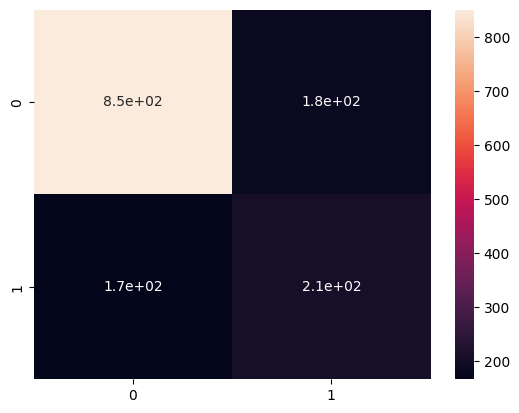

In [197]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(conf_matrix,annot=True)
print("Confusion Matrix:")
print(conf_matrix)

## Logistic Regression

## Model training

In [198]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Model testing

In [199]:
y_pred_log_reg = log_reg.predict(X_test)

## Model Evaluation

In [200]:
accuracy = accuracy_score(y_test, y_pred_log_reg)
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7725657427149965
Precision: 0.5944055944055944
Recall: 0.45454545454545453
F1 Score: 0.5151515151515151


## Random Forest

## Model training

In [201]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

## Model testing

In [202]:
y_pred_rf = rf.predict(X_test)

## Model Evaluation

In [203]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7910447761194029
Precision: 0.6724137931034483
Recall: 0.41711229946524064
F1 Score: 0.5148514851485149


## Support Vector Machine

In [204]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [1, 0.1, 0.01],
    'degree': [2, 3, 4]  
}

svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}


## Model Prediction

In [205]:
y_pred = best_model.predict(X_test)
print(y_pred)

[0 0 1 ... 0 0 0]


## Model Evaluation

In [206]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7917555081734187
Precision: 0.6336633663366337
Recall: 0.5133689839572193
F1 Score: 0.5672082717872969


## One hot encoding to increase Accuracy

In [207]:
categorical_columns = ['SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']


for i in categorical_columns:
    df[i] = df[i].astype('category') 

df_encoded = pd.get_dummies(df)
df_encoded = pd.get_dummies(df)
df_encoded = df_encoded.astype(int)
df_encoded.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen_0',
       'SeniorCitizen_1', 'Partner_0', 'Partner_1', 'Dependents_0',
       'Dependents_1', 'PhoneService_0', 'PhoneService_1', 'MultipleLines_0',
       'MultipleLines_1', 'MultipleLines_2', 'InternetService_0',
       'InternetService_1', 'InternetService_2', 'OnlineSecurity_0',
       'OnlineSecurity_1', 'OnlineSecurity_2', 'OnlineBackup_0',
       'OnlineBackup_1', 'OnlineBackup_2', 'DeviceProtection_0',
       'DeviceProtection_1', 'DeviceProtection_2', 'TechSupport_0',
       'TechSupport_1', 'TechSupport_2', 'StreamingTV_0', 'StreamingTV_1',
       'StreamingTV_2', 'StreamingMovies_0', 'StreamingMovies_1',
       'StreamingMovies_2', 'Contract_0', 'Contract_1', 'Contract_2',
       'PaperlessBilling_0', 'PaperlessBilling_1', 'PaymentMethod_0',
       'PaymentMethod_1', 'PaymentMethod_2', 'PaymentMethod_3'],
      dtype='object')

In [208]:
X =df_encoded
y=df["Churn"]

# Train test split after one hot encoding

In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)

In [210]:
display(X_train)
display(X_test)
print(X_train.shape)
print(y_train.unique())

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,...,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
6030,-1,-2,-1,1,1,0,1,0,1,0,...,1,1,0,0,0,1,1,0,0,0
3410,-1,-2,-1,1,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
5483,-1,-2,-1,1,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
5524,-1,-2,-1,0,1,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
6337,-1,-2,-1,0,1,0,0,1,0,1,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,-1,-2,-1,0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
5199,-1,-2,-1,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
5235,-1,-2,-1,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5399,-1,-2,-1,0,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0


,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,...,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
2481,-1,-2,-1,0,0,1,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0
6784,-1,-2,-1,0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
6125,-1,-2,-1,1,1,0,0,1,1,0,...,1,1,0,0,0,1,0,1,0,0
3052,-1,-2,-1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4099,-1,-2,-1,0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,-1,-2,-1,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
5250,-1,-2,-1,0,1,0,1,0,1,0,...,1,1,0,0,1,0,0,0,1,0
5465,-1,-2,-1,0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
5851,-1,-2,-1,0,0,1,1,0,1,0,...,1,0,1,0,0,1,1,0,0,0


(5625, 45)
[1 0]


In [211]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5625 entries, 6030 to 862
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   tenure              5625 non-null   int32
 1   MonthlyCharges      5625 non-null   int32
 2   TotalCharges        5625 non-null   int32
 3   Churn               5625 non-null   int32
 4   SeniorCitizen_0     5625 non-null   int32
 5   SeniorCitizen_1     5625 non-null   int32
 6   Partner_0           5625 non-null   int32
 7   Partner_1           5625 non-null   int32
 8   Dependents_0        5625 non-null   int32
 9   Dependents_1        5625 non-null   int32
 10  PhoneService_0      5625 non-null   int32
 11  PhoneService_1      5625 non-null   int32
 12  MultipleLines_0     5625 non-null   int32
 13  MultipleLines_1     5625 non-null   int32
 14  MultipleLines_2     5625 non-null   int32
 15  InternetService_0   5625 non-null   int32
 16  InternetService_1   5625 non-null   int32
 17

In [212]:
X_train.shape,y_train.shape

((5625, 45), (5625,))

# Model Training after onehot encoding

In [213]:
model = Sequential()
model.add( Dense (500, input_shape = (45,)))
model.add( ReLU() )

model.add( Dense(400))
model.add( ReLU() )

model.add( Dense(300) )
model.add( ReLU() )

model.add( Dense(200) )
model.add(ReLU())

model.add( Dense(100) )
model.add( ReLU() )


model.add( Dense(1, activation = 'sigmoid' ))

In [214]:
model.compile(optimizer = Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [215]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
141/141 [==============================] - 3s 11ms/step - loss: 0.0688 - accuracy: 0.9693 - val_loss: 8.2562e-06 - val_accuracy: 1.0000
Epoch 2/10
141/141 [==============================] - 1s 8ms/step - loss: 4.0763e-06 - accuracy: 1.0000 - val_loss: 2.6612e-06 - val_accuracy: 1.0000
Epoch 3/10
141/141 [==============================] - 1s 6ms/step - loss: 1.4601e-06 - accuracy: 1.0000 - val_loss: 7.8214e-07 - val_accuracy: 1.0000
Epoch 4/10
141/141 [==============================] - 1s 6ms/step - loss: 5.8916e-07 - accuracy: 1.0000 - val_loss: 4.2236e-07 - val_accuracy: 1.0000
Epoch 5/10
141/141 [==============================] - 1s 6ms/step - loss: 3.5343e-07 - accuracy: 1.0000 - val_loss: 2.7541e-07 - val_accuracy: 1.0000
Epoch 6/10
141/141 [==============================] - 1s 6ms/step - loss: 2.4309e-07 - accuracy: 1.0000 - val_loss: 1.9657e-07 - val_accuracy: 1.0000
Epoch 7/10
141/141 [==============================] - 1s 5ms/step - loss: 1.7864e-07 - accuracy: 1.0000

## Model Prediction

In [216]:
y_pred = model.predict(X_test)

44/44 [==============================] - 0s 2ms/step


In [217]:
y_test_v = y_test.values
y_pred = y_pred.flatten()

In [218]:
import numpy as np
threshold = 0.5
y_pred_binary = np.where(y_pred >= threshold, 1, 0)
y_pred_binary

array([0, 0, 1, ..., 0, 0, 0])

In [219]:
print(y_test_v)
print(y_pred_binary)

[0 0 1 ... 0 0 0]
[0 0 1 ... 0 0 0]


## Model Evaluation

In [220]:
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Confusion Matrix:
[[1033    0]
 [   0  374]]


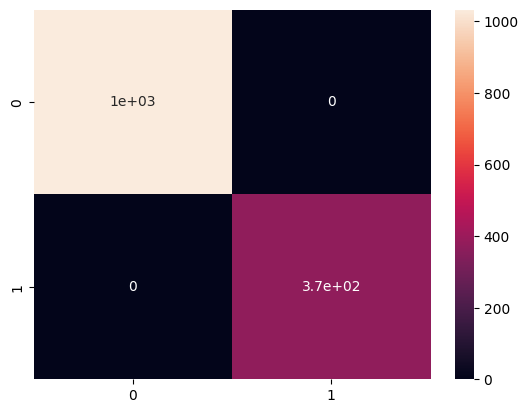

In [221]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(conf_matrix,annot=True)
print("Confusion Matrix:")
print(conf_matrix)